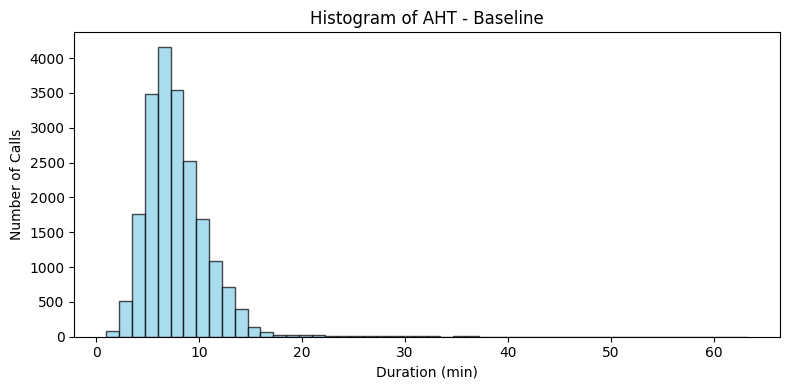

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("dataset.csv", parse_dates=["date"])

# --- 1. Histogram of AHT (Baseline) ---
baseline = df[df['phase'] == 'Baseline']
plt.figure(figsize=(8,4))
plt.hist(baseline['duration_min'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram of AHT - Baseline')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()


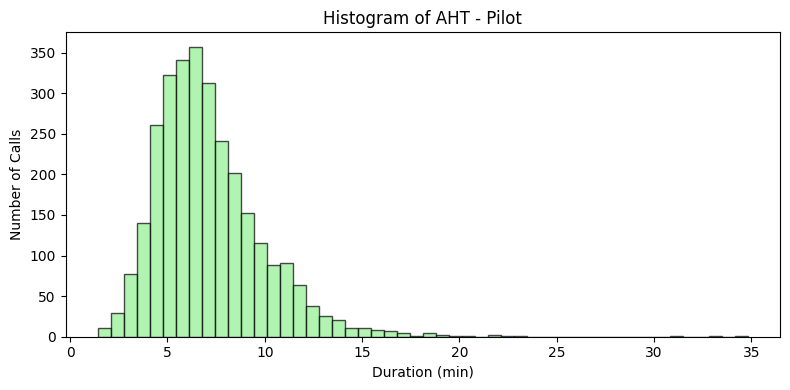

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("dataset.csv", parse_dates=["date"])

# --- 2. Histogram of AHT (Pilot) ---
pilot = df[df['phase'] == 'Pilot']
plt.figure(figsize=(8,4))
plt.hist(pilot['duration_min'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Histogram of AHT - Pilot')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Calls')
plt.tight_layout()
plt.show()


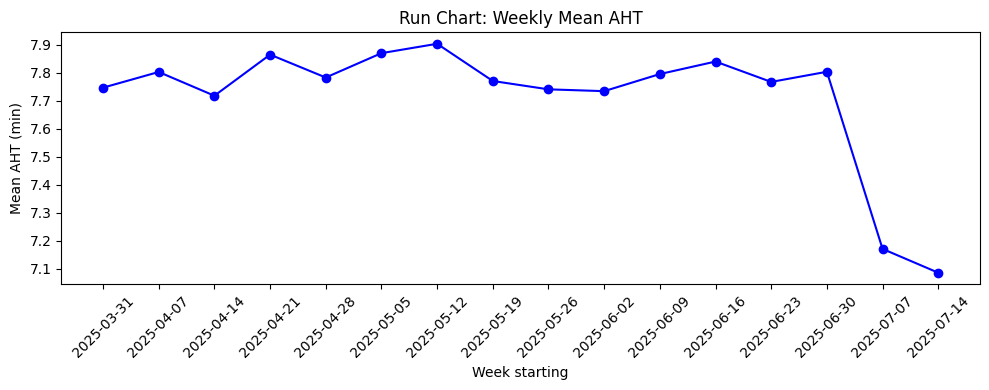

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("dataset.csv", parse_dates=["date"])

# Ensure week column if not present
if "week" not in df.columns:
    df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time.date())

# --- 3. Run Chart (Weekly Mean AHT) ---
weekly = df.groupby(['week'])['duration_min'].mean().reset_index()
plt.figure(figsize=(10,4))
plt.plot(weekly['week'], weekly['duration_min'], marker='o', color='blue')
plt.xticks(rotation=45)
plt.title('Run Chart: Weekly Mean AHT')
plt.xlabel('Week starting')
plt.ylabel('Mean AHT (min)')
plt.tight_layout()
plt.show()


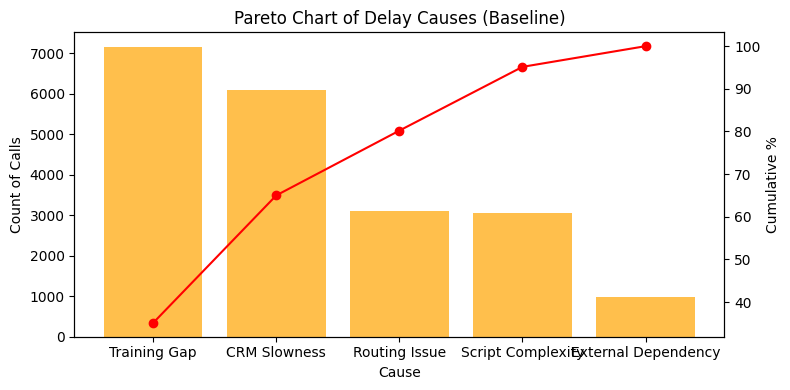

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("dataset.csv", parse_dates=["date"])

# --- 4. Pareto Chart of Delay Causes (Baseline) ---
baseline = df[df['phase'] == 'Baseline']
cause_counts = baseline['delay_cause'].value_counts().reset_index()
cause_counts.columns = ['Cause','Count']
cause_counts['Cumulative %'] = 100 * cause_counts['Count'].cumsum() / cause_counts['Count'].sum()

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.bar(cause_counts['Cause'], cause_counts['Count'], color='orange', alpha=0.7)
ax1.set_xlabel('Cause')
ax1.set_ylabel('Count of Calls')
ax2 = ax1.twinx()
ax2.plot(cause_counts['Cause'], cause_counts['Cumulative %'], color='red', marker='o')
ax2.set_ylabel('Cumulative %')
plt.title('Pareto Chart of Delay Causes (Baseline)')
plt.tight_layout()
plt.show()


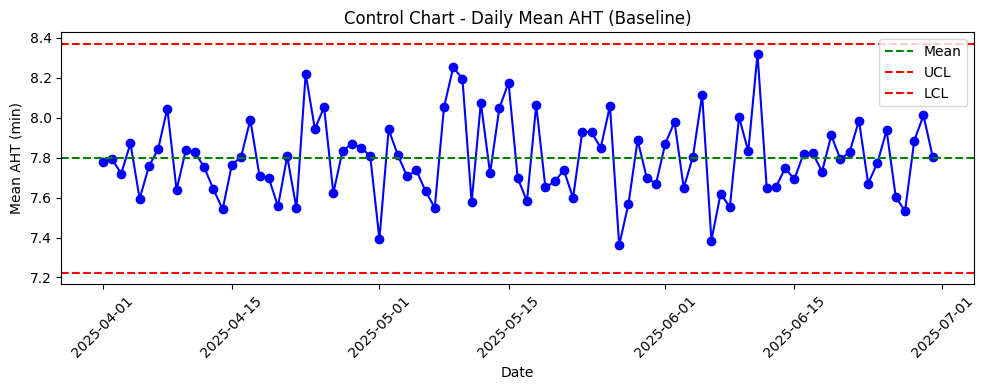

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("dataset.csv", parse_dates=["date"])

# --- 5. Control Chart for Daily Mean AHT (Baseline) ---
baseline = df[df['phase'] == 'Baseline']
daily = baseline.groupby('date')['duration_min'].mean().reset_index()
X = daily['duration_min'].values
MR = np.abs(np.diff(X))
MR_bar = MR.mean()
X_bar = X.mean()
d2 = 1.128  # constant for n=2
sigma_est = MR_bar / d2
UCL = X_bar + 3*sigma_est
LCL = X_bar - 3*sigma_est

plt.figure(figsize=(10,4))
plt.plot(daily['date'], X, marker='o', color='blue')
plt.axhline(X_bar, linestyle='--', color='green', label='Mean')
plt.axhline(UCL, linestyle='--', color='red', label='UCL')
plt.axhline(LCL, linestyle='--', color='red', label='LCL')
plt.title('Control Chart - Daily Mean AHT (Baseline)')
plt.xlabel('Date')
plt.ylabel('Mean AHT (min)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Vedant\AppData\Local\Temp\ipykernel_48476\4154725222.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_shift, labels=shifts)


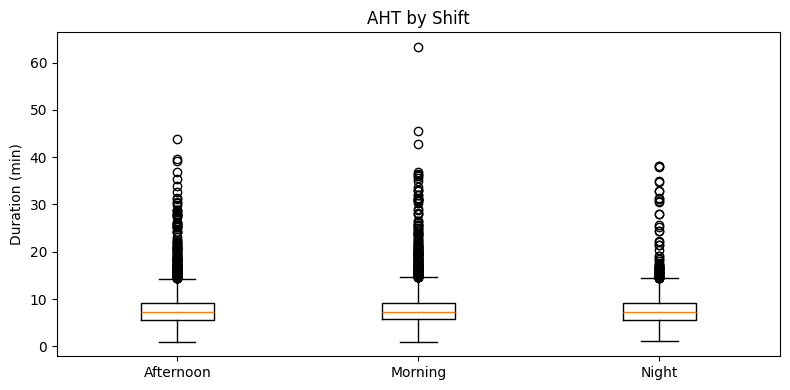

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("dataset.csv", parse_dates=["date"])

# --- 6. Boxplot of AHT by Shift ---
shifts = df['shift'].unique()
data_by_shift = [df[df['shift']==s]['duration_min'] for s in shifts]
plt.figure(figsize=(8,4))
plt.boxplot(data_by_shift, labels=shifts)
plt.title('AHT by Shift')
plt.ylabel('Duration (min)')
plt.tight_layout()
plt.show()
